# SVM Jordan Crouser

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [4]:
# function to show scatterplot and SVM boundaries

In [5]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(12,6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], s=70, c=y, alpha=0.7)

    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k',marker = 'x', s=70, cmap = mpl.cm.Paired, 
                                                      linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid()
    print('Number of support vectors: ', svc.support_.size)

### non-linearly separable classes

In [ ]:
# dataset

In [6]:
n=20
np.random.seed(5)
X = np.random.randn(n,2)
y = np.repeat([1,-1],n/2)
X[y == -1] = X[y == -1]+1

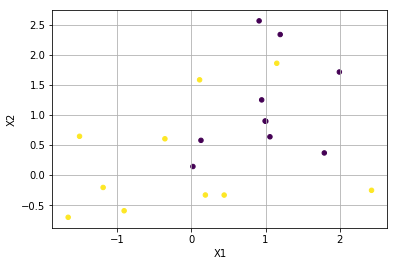

In [7]:
plt.scatter(X[:,0], X[:,1], s=20, c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()

In [ ]:
# not linearly separable

In [ ]:
# fit a SVC with linear boundary and C=1

In [8]:
svc = SVC(C=1, kernel='linear')
svc.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [117]:
# use plot_svc() function

Number of support vectors:  13


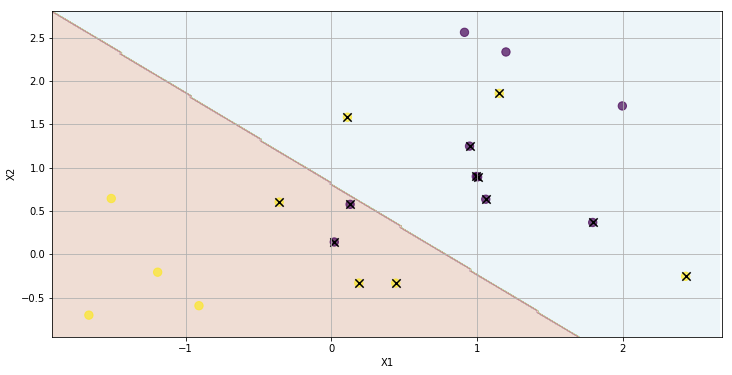

In [9]:
plot_svc(svc, X, y)

In [ ]:
# region assigned to the −1 class is blue, 
# region assigned to the +1 class is brown

In [ ]:
# support vectors are marked X

In [10]:
svc.support_

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8])

In [11]:
# decrese cost to C=0.10

Number of support vectors:  16


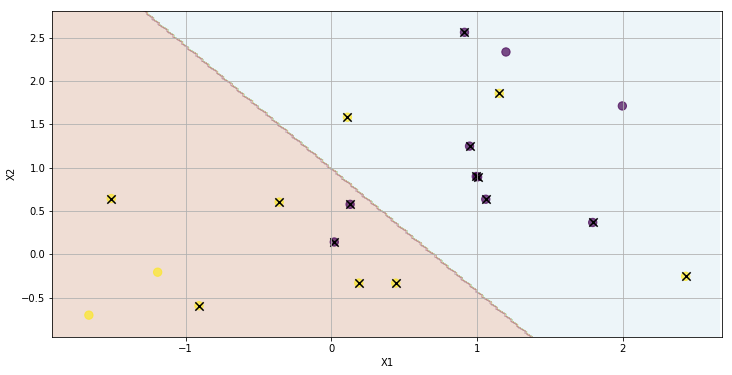

In [12]:
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

In [13]:
# decreasing cost C, increases number of support vectors

### Kfold Cross validation to find best cost c

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
# 10-fold cross validation on cost

In [16]:
param_grid = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]

In [17]:
clf = GridSearchCV(SVC(kernel='linear'), param_grid, cv=10, scoring='accuracy',
                   return_train_score = True)
clf.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [18]:
# output of GridSearchCV

In [19]:
clf.cv_results_

{'mean_fit_time': array([0.0004003 , 0.00069702, 0.00079784, 0.00049868, 0.0004986 ,
        0.00019944, 0.00049863]),
 'std_fit_time': array([0.00049028, 0.00045632, 0.00039892, 0.00049868, 0.00066912,
        0.00039887, 0.00049863]),
 'mean_score_time': array([0.00059795, 0.00019932, 0.00019925, 0.00039778, 0.00059814,
        0.000299  , 0.00029941]),
 'std_score_time': array([0.00048823, 0.00039864, 0.00039849, 0.00048719, 0.00048838,
        0.00045673, 0.00045735]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ]),
 'split2_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split3_test_score': array([1

In [20]:
# best cost

In [21]:
clf.best_params_

{'C': 0.001}

In [22]:
# test data

In [23]:
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1]-1

In [24]:
# test performance

In [25]:
svc2 = SVC(C=0.001, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, 
                                               columns=svc2.classes_)

,-1,1
-1,2,6
1,0,12


In [26]:
df1 = pd.DataFrame()
df1['y_test'] = y_test
df1['y_pred'] = y_pred
df1

,y_test,y_pred
0,-1,-1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,-1,1
8,-1,1
9,1,1


In [27]:
# misclassified rows

In [28]:
df1[y_test != y_pred]

,y_test,y_pred
7,-1,1
8,-1,1
12,-1,1
14,-1,1
15,-1,1
16,-1,1


In [29]:
# 14 of the test observations are correctly classified

### linearly separable classes

In [30]:
# modify test set 

In [31]:
X_test[y_test == 1] = X_test[y_test == 1] -1

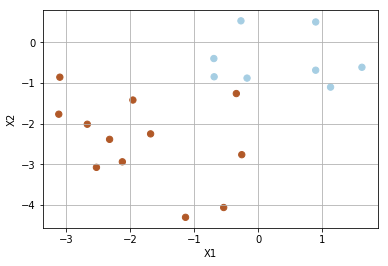

In [32]:
plt.scatter(X_test[:,0], X_test[:,1], s=40, c=y_test,cmap = mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()

In [33]:
# now the observations are just barely linearly separable

In [34]:
# increase cost C = 1e5 to get a small margin

Number of support vectors:  3


<Figure size 864x432 with 0 Axes>

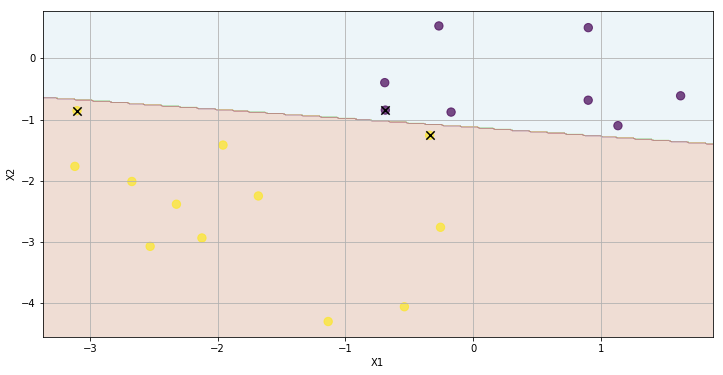

In [35]:
plt.figure(figsize=(12,6))
svc3 = SVC(C=1e5, kernel='linear')
svc3.fit(X_test, y_test)
plot_svc(svc3, X_test, y_test);

In [ ]:
# the margin is very narrow since 
# some obs that are not support vectors are close to the SVM boundary

In [36]:
# decrease to Cost = 1

Number of support vectors:  5


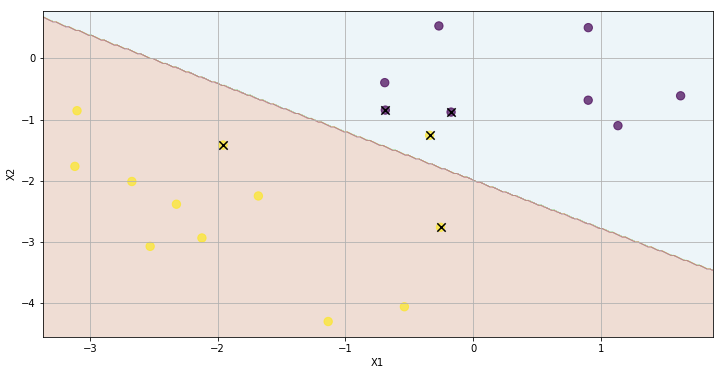

In [37]:
svc4 = SVC(C=1, kernel='linear')
svc4.fit(X_test, y_test)
plot_svc(svc4, X_test, y_test)

In [38]:
# Margin is wider, one blue obs is misclassified

## Support Vector Machine -nonlinear kernel

In [39]:
# To fit polynomial SVM use kernel= "poly"

In [40]:
# to fit an SVM with a radial kernel use kernel= "rbf" with a gamma argument

### Validation approach

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# data with a nonlinear boundary

In [43]:
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=2)

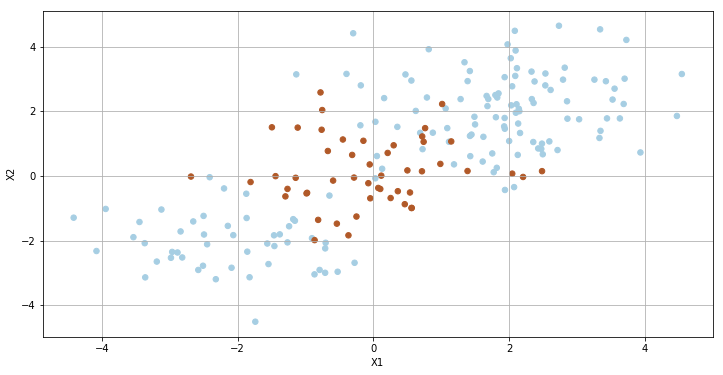

In [45]:
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], s=30, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()

In [46]:
# one class is within the other class. Use a radial kernel.

In [47]:
# use C=1 and gamma = 1

In [48]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Number of support vectors:  51


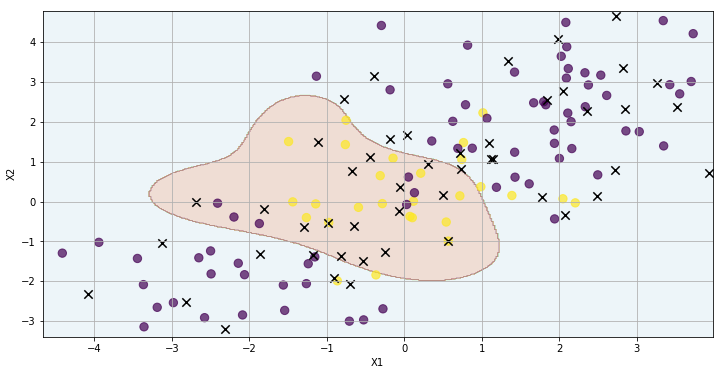

In [49]:
plot_svc(svm, X_test, y_test)

In [50]:
# lots of misclassified points

In [51]:
# increase cost C=10 to decrease margin

In [52]:
svm2 = SVC(C=10, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Number of support vectors:  42


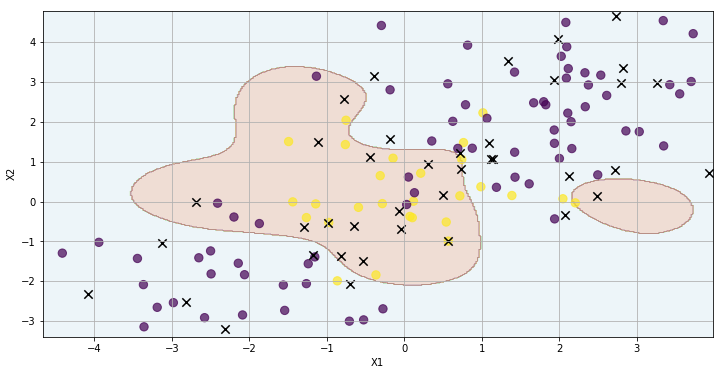

In [53]:
plot_svc(svm2, X_test, y_test)

In [54]:
# less number of support vectors at the price of a more irregular decision boundary

### Kfold cross-validation to select the best choice of gamma and cost

In [55]:
param_grid = [{'C': [0.01, 0.1, 1, 10, 100],'gamma': [0.5, 1,2,3,4]}]

In [56]:
clf = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10, scoring='accuracy',
                                                         iid = False)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.5, 1, 2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [57]:
clf.best_params_

{'C': 1, 'gamma': 1}

In [58]:
# model with best parameters is already available

In [59]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Number of support vectors:  51


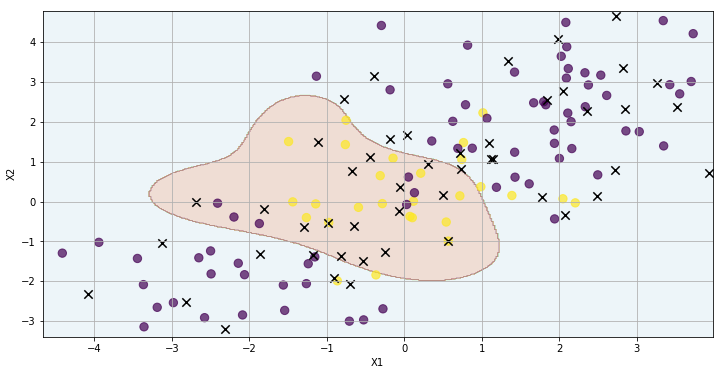

In [60]:
plot_svc(clf.best_estimator_, X_test, y_test)

In [61]:
# test accuracy rate

In [62]:
y_pred = clf.best_estimator_.predict(X_test)
pd.DataFrame(confusion_matrix(y_test,y_pred),index = clf.best_estimator_.classes_,
                                            columns=clf.best_estimator_.classes_)

,-1,1
-1,67,6
1,9,18


In [63]:
print(clf.best_estimator_.score(X_test, y_test))

0.85


## ROC Curves

In [64]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [65]:
# compare gamma=1 vs gamma = 50 with same cost C=1

In [66]:
svm3 = SVC(kernel='rbf', gamma=1)
svm3.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
svm4 = SVC(kernel='rbf', gamma=50)
svm4.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
# use decision_function() to get fitted values

In [78]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

In [79]:
y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

In [80]:
# training and test values

In [81]:
false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

In [82]:
false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

In [83]:
false_pos_rate33, true_pos_rate33, _ = roc_curve(y_test, y_test_score3)
roc_auc33 = auc(false_pos_rate33, true_pos_rate33)

In [84]:
false_pos_rate44, true_pos_rate44, _ = roc_curve(y_test, y_test_score4)
roc_auc44 = auc(false_pos_rate44, true_pos_rate44)

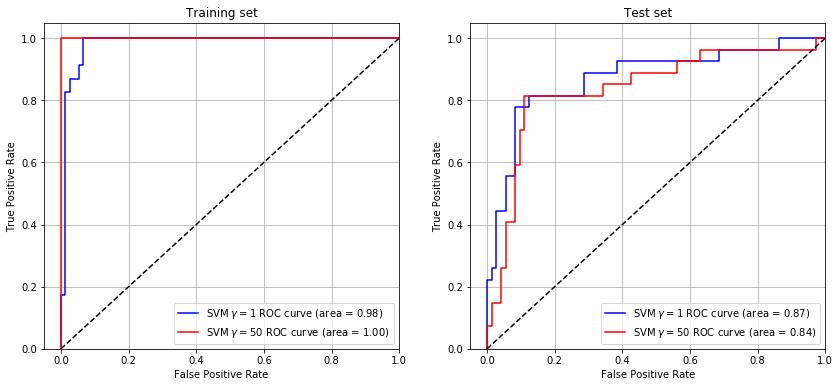

In [86]:
# split window
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))

# plot ROC curve for training set
ax1.plot(false_pos_rate3, true_pos_rate3, 
         label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, 
         label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training set')

# plot ROC curve for trest set
ax2.plot(false_pos_rate33, true_pos_rate33, 
         label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc33, color='b')
ax2.plot(false_pos_rate44, true_pos_rate44, 
         label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc44, color='r')
ax2.set_title('Test set')

# add common attributes
for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")
    ax.grid()

In [ ]:
# gamma = 1 better than gamma = 50, for test performance

## SVM with Multiple Classes

In [87]:
# The svm() function performs multi-class classification 
# using the one-versus-one approach

In [88]:
# dataset with 3 categories

In [89]:
np.random.seed(8)
XX = np.vstack([X, np.random.randn(50,2)])
yy = np.hstack([y, np.repeat(0,50)])
XX[yy ==0] = XX[yy == 0] +4

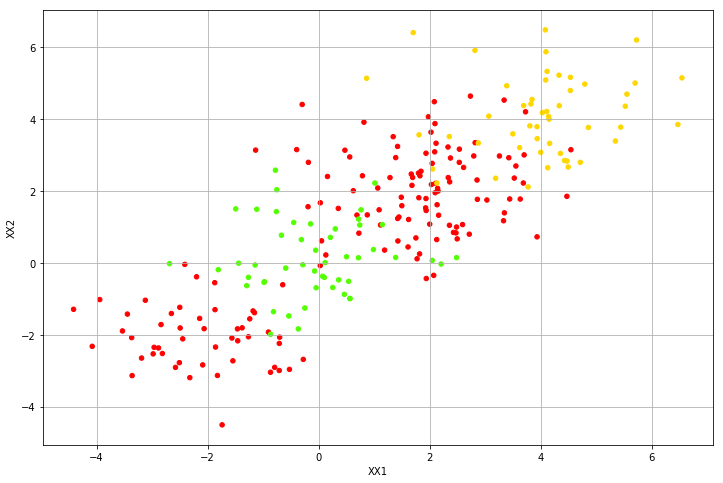

In [90]:
plt.figure(figsize=(12,8))
plt.scatter(XX[:,0], XX[:,1], s=20, c=yy, cmap=plt.cm.prism)
plt.xlabel('XX1')
plt.ylabel('XX2')
plt.grid()

In [91]:
svm5 = SVC(C=1, kernel='rbf',gamma = 'auto')
svm5.fit(XX, yy)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Number of support vectors:  133


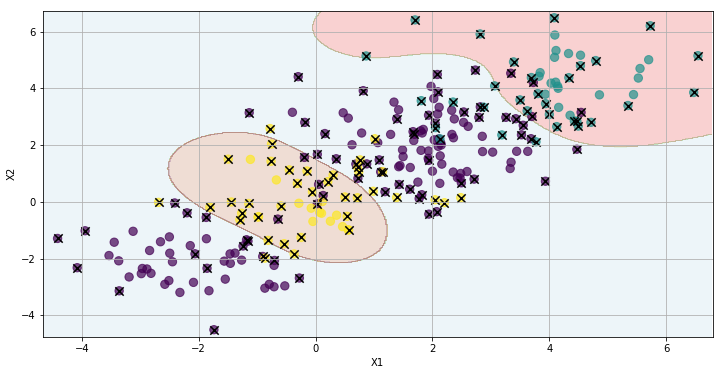

In [92]:
plot_svc(svm5, XX, yy)

## Application to Handwritten Letter Data

In [ ]:
# optdigits.tra and optdigits.tes datasets available at

In [ ]:
# archive.ics.uci.edu/ml/machine-learning-databases/optdigits/

In [93]:
X_train = pd.read_csv('optdigits.tra', header=None)
y_train = X_train[64]
X_train = X_train.drop(X_train.columns[64], axis=1)

In [94]:
X_test = pd.read_csv('optdigits.tes', header=None)
y_test = X_test[64]
X_test = X_test.drop(X_test.columns[64], axis=1)

In [95]:
X_train.shape

(3823, 64)

In [96]:
X_test.shape

(1797, 64)

In [97]:
# preprocessed images of handwriting numbers from 43 different people

In [98]:
# Each image was converted into an 8x8 matrix (64 pixels), 
# which was then flattened into a vector of 64 numeric values
# The final column contains the digit

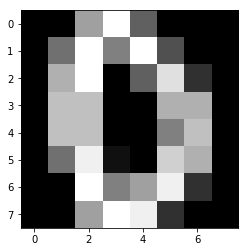

In [99]:
plt.imshow(X_train.values[1].reshape(8,8), cmap="gray");

In [100]:
y_train[0]

0

In [101]:
# digit 0

In [102]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [103]:
# training performance

In [104]:
cm = confusion_matrix(y_train, svc.predict(X_train))
pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)

,0,1,2,3,4,5,6,7,8,9
0,376,0,0,0,0,0,0,0,0,0
1,0,389,0,0,0,0,0,0,0,0
2,0,0,380,0,0,0,0,0,0,0
3,0,0,0,389,0,0,0,0,0,0
4,0,0,0,0,387,0,0,0,0,0
5,0,0,0,0,0,376,0,0,0,0
6,0,0,0,0,0,0,377,0,0,0
7,0,0,0,0,0,0,0,387,0,0
8,0,0,0,0,0,0,0,0,380,0
9,0,0,0,0,0,0,0,0,0,382


In [ ]:
# No training errors

In [ ]:
# not surprising, because the large number of variables relative to the number of obs
# implies that it is easy to find hyperplanes that fully separate the classes. 

In [ ]:
# test performance

In [105]:
cm = confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(cm, index=svc.classes_, columns=svc.classes_)

,0,1,2,3,4,5,6,7,8,9
0,177,0,0,0,0,1,0,0,0,0
1,0,178,0,0,0,0,3,0,1,0
2,0,7,170,0,0,0,0,0,0,0
3,1,0,5,171,0,2,0,2,1,1
4,0,0,0,0,180,0,0,0,1,0
5,0,0,1,0,0,180,0,0,0,1
6,0,0,0,0,1,0,179,0,1,0
7,0,0,0,0,1,7,0,165,0,6
8,0,9,1,5,0,2,0,0,157,0
9,1,0,0,4,1,3,0,0,1,170


In [ ]:
# We see that using cost = 1.0 yields 71 test set errors on this data

In [108]:
# error rate
71/1797

0.03951029493600445

In [ ]:
# try using the  GridSearchCV on the cost C in the range 0.01 to 100